In [22]:
#importing necessary libraries
import numpy as np
import pandas as pd
import wordcloud,string,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from string import punctuation
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [3]:
#Reading datasets
imdb=pd.read_csv('IMDB_Dataset.csv')

In [4]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#info of data of dataset
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
#Identification of null or missing data
mis_data=imdb.isnull().sum()
print(mis_data)

review       0
sentiment    0
dtype: int64


In [7]:
#as no missing data is present we will check for duplicate data
dupl_data=imdb.duplicated().sum()
print(dupl_data)

418


In [8]:
#removing duplicate data
imdb.drop_duplicates(keep='first',inplace=True)

In [9]:
imdb.shape

(49582, 2)

In [10]:
#Removing useless words from our review sentences
stp=set(stopwords.words('english'))
punct=list(string.punctuation)
stp.add(tuple(punct))
wl=WordNetLemmatizer()

In [11]:
#Removing html tags
def remove_html(text):
    sp=BeautifulSoup(text,"html.parser")
    return sp.get_text()

#Removing url's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing brackets
def remove_bracket(text):
   return re.sub('\[[^]]*\]', '', text)

#Removing stopwords
def remove_stopwords(text,lemmatize=True):
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stp and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stp and word.isalpha()]) 
    return text
#Summing all the cleaning in one function
def clean_text(text,lemmatize=True):
    text=remove_html(text)
    text=remove_bracket(text)
    text=remove_url(text)
    text=remove_stopwords(text)
    return text
 


In [12]:
#Final cleaning of data
imdb['review']=imdb['review'].apply(clean_text,lemmatize=True)

c:\Users\Shreya Mishra\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [13]:
#Replacing sentiment values with numeric values
imdb.sentiment.replace("negative",0,inplace=True)
imdb.sentiment.replace("positive",1,inplace=True) 

In [14]:
#Exploration of data
print('Positive reviews', imdb['sentiment'].value_counts()[0],imdb['sentiment'].value_counts()[0]/len(imdb) * 100,"%")
print('Negative reviews', imdb['sentiment'].value_counts()[1],imdb['sentiment'].value_counts()[1]/len(imdb) * 100,"%")

Positive reviews 24698 49.81243193094268 %
Negative reviews 24884 50.18756806905732 %


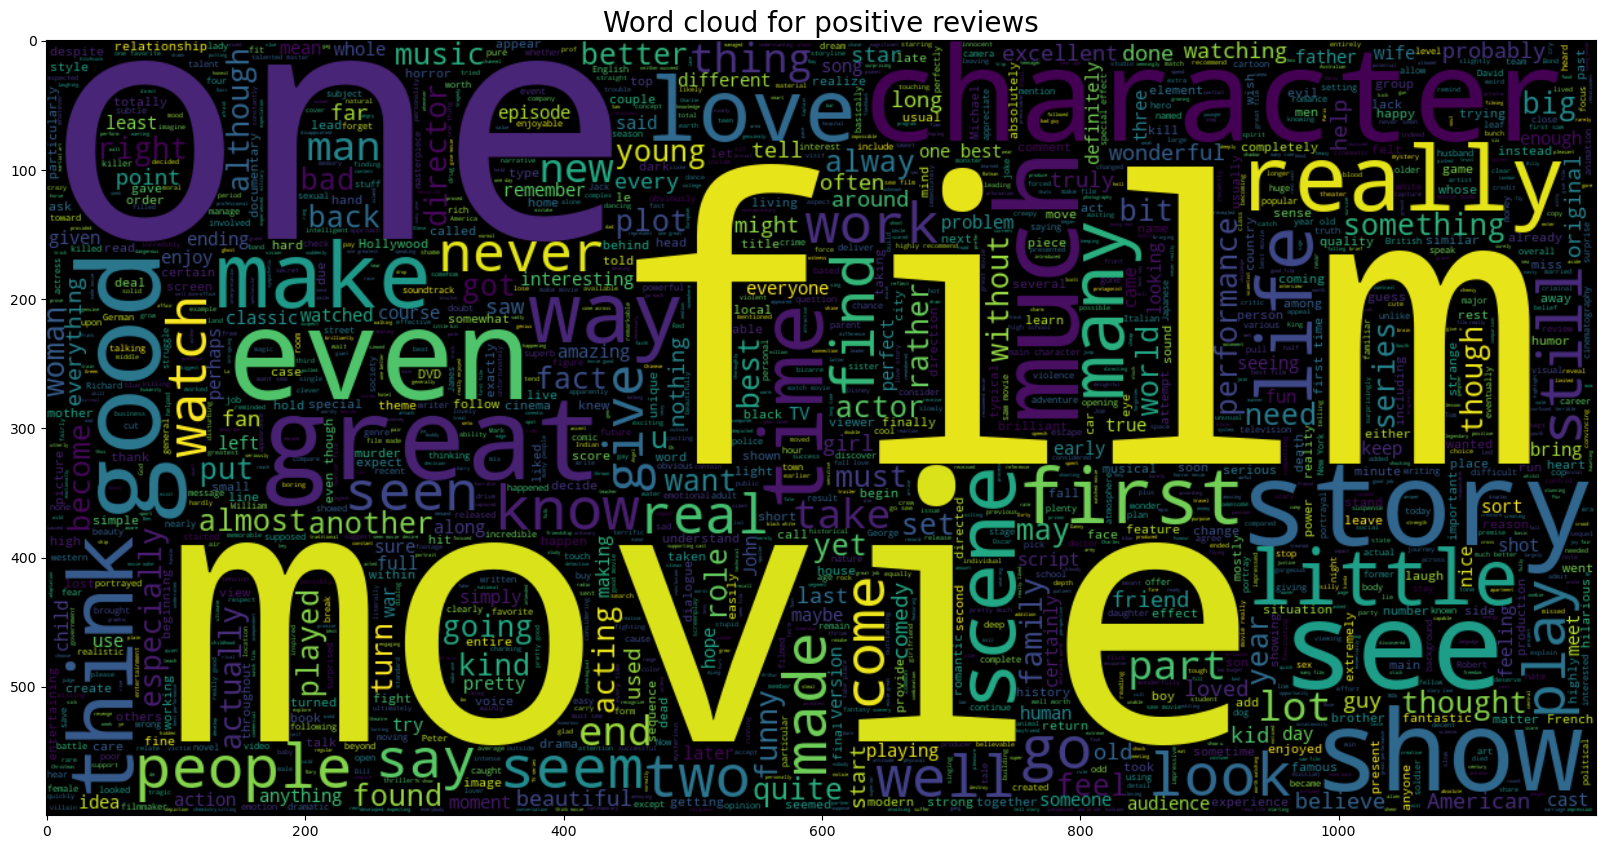

In [17]:
#word cloud for positive reviews
pos_data = imdb[imdb.sentiment == 1]['review']
pos_data_string = ' '.join(pos_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(pos_data_string)
plt.imshow(wc , interpolation = 'bilinear')
#plt.axis('on')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

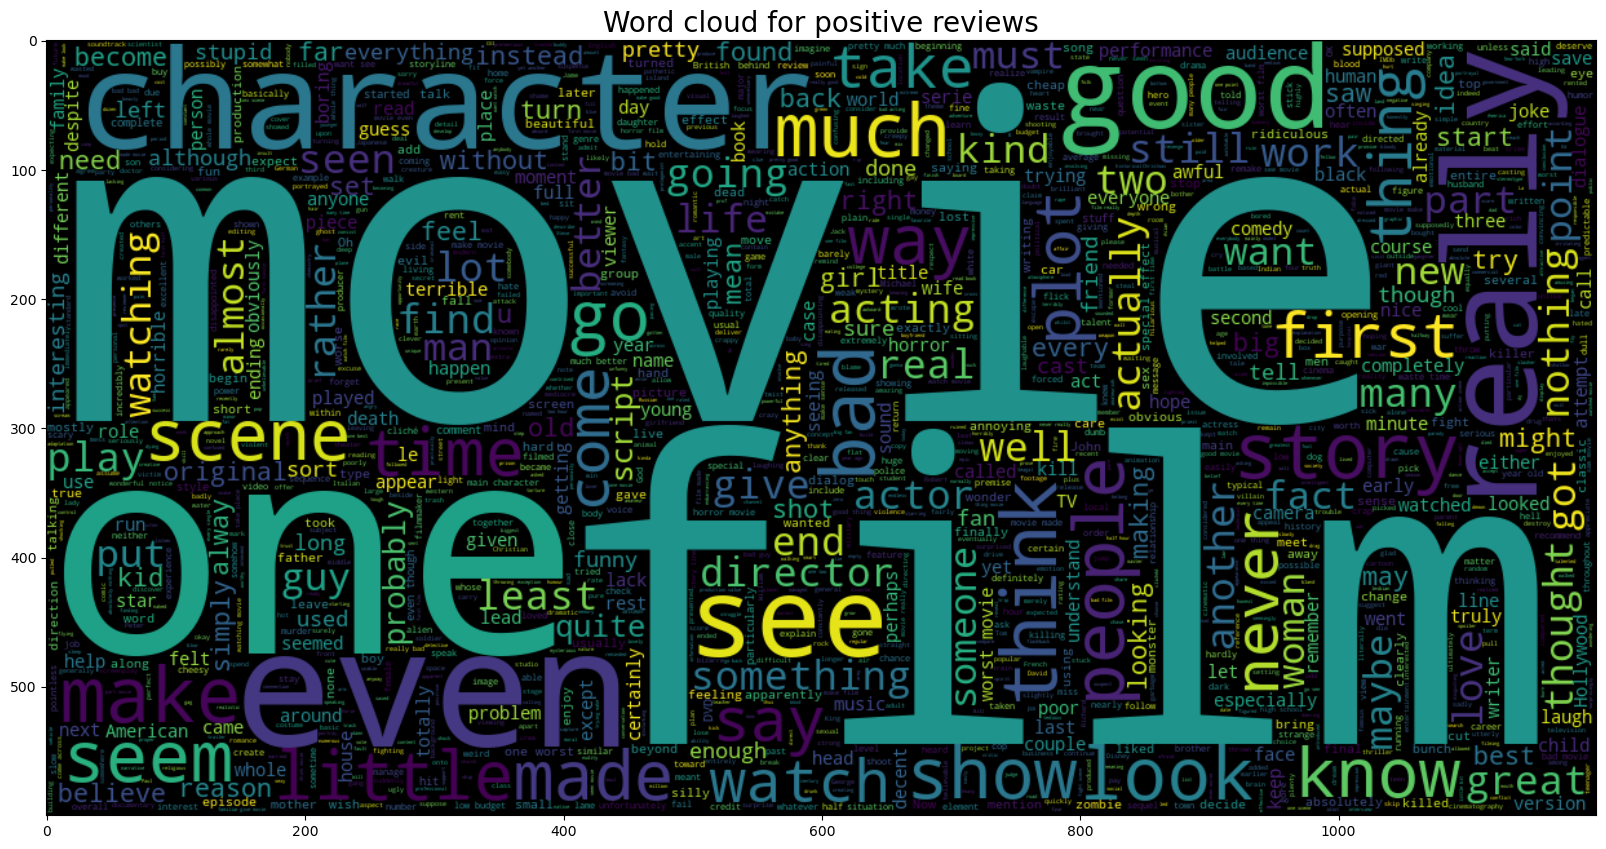

In [18]:
#word cloud for negative reviews
pos_data = imdb[imdb.sentiment == 0]['review']
pos_data_string = ' '.join(pos_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(pos_data_string)
plt.imshow(wc , interpolation = 'bilinear')
#plt.axis('on')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

In [29]:
#Predictive Modelling using Machine Learning
#splitting into train and test
train, test= train_test_split(imdb, test_size=0.2, random_state=1)
X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

In [30]:
#Vectorizing data using  

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


count_vect = CountVectorizer() # CountVectorizer
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

Logistic Regression Accuracy : 87.44%


c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


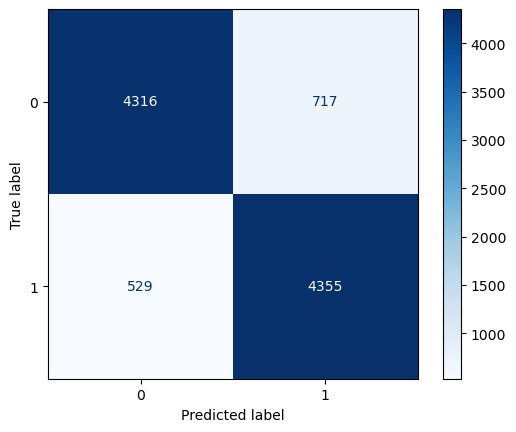

In [32]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)
p1=lr.predict(X_test_tfidf)
s1=accuracy_score(y_test,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression Accuracy : 86.19%


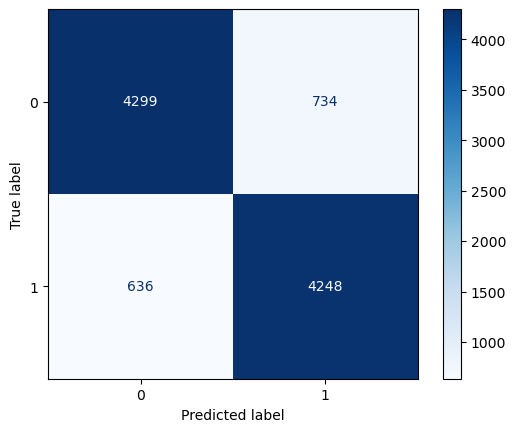

In [31]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_count,y_train)
p1=lr.predict(X_test_count)
s1=accuracy_score(y_test,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, X_test_count, y_test,cmap = 'Blues')
plt.grid(False)

In [33]:
#We will use tf_idf as it offers better accuracy with logistic regression

Linear Support Vector Classifier Accuracy : 87.63%


c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


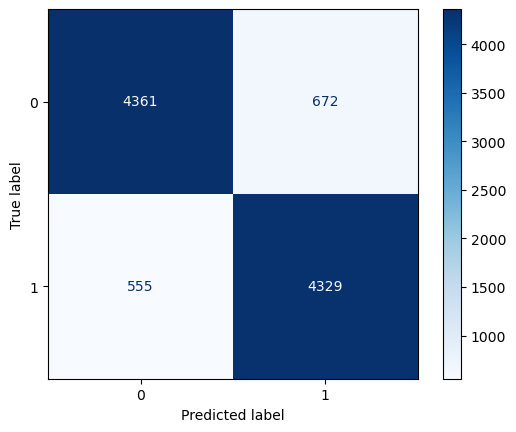

In [34]:
# Implementing Linear Support Vector Machine model
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(X_train_tfidf,y_train)
p3=linear_svc.predict(X_test_tfidf)
s3=accuracy_score(y_test,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, X_test_tfidf, y_test,cmap = 'Blues')
plt.grid(False)

c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Shreya Mishra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Linear Support Vector Classifier Accuracy : 83.68%


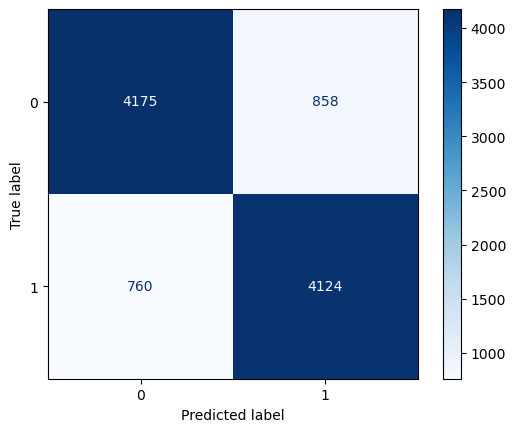

In [35]:
# Implementing Linear Support Vector Machine model
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(X_train_count,y_train)
p3=linear_svc.predict(X_test_count)
s3=accuracy_score(y_test,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, X_test_count, y_test,cmap = 'Blues')
plt.grid(False)

In [ ]:
#We will use tf_idf as it offers better accuracy with linear Support Vector Machine